In [1]:
%matplotlib inline

import os
from keras.utils import get_file
import gensim
import subprocess
import numpy as np
import matplotlib.pyplot as plt
from IPython.core.pylabtools import figsize
figsize(10, 10)

from sklearn.manifold import TSNE
import json
from collections import Counter
from itertools import chain

Using TensorFlow backend.


In [2]:
MODEL = 'GoogleNews-vectors-negative300.bin'
"""
Suppose that GoogleNews-vectors-negative300 is already installed in generated folder.
path = get_file(MODEL + '.gz', 'https://s3.amazonaws.com/dl4j-distribution/%s.gz' % MODEL)
"""
if not os.path.isdir('generated'):
    os.mkdir('generated')

unzipped = os.path.join('generated', MODEL)

In [3]:
if not os.path.isfile(unzipped):
    with open(unzipped, 'wb') as fout:
        zcat = subprocess.Popen(['zcat'],
                          stdin=open(path),
                          stdout=fout
                         )
        zcat.wait()

In [4]:
model=gensim.models.KeyedVectors.load_word2vec_format(unzipped, binary=True)

most_similar(positive=None, negative=None, topn=10, restrict_vocab=None, indexer=None)
Deprecated, use self.wv.most_similar() instead.

Refer to the documentation for most_similar().

In [5]:
model.most_similar(positive=['espresso'])

[('cappuccino', 0.6888186931610107),
 ('mocha', 0.6686209440231323),
 ('coffee', 0.6616827249526978),
 ('latte', 0.6536753177642822),
 ('caramel_macchiato', 0.6491268277168274),
 ('ristretto', 0.648554801940918),
 ('espressos', 0.6438628435134888),
 ('macchiato', 0.6428250074386597),
 ('chai_latte', 0.6308028697967529),
 ('espresso_cappuccino', 0.6280542612075806)]

In [18]:
def A_is_ti_B_as_C_is_to(a,b,c,topn=1):
    #Take a,b,c as input and typecast a,b,c to list form.
    a,b,c=map(lambda x:x if type(x)==list else [x], (a,b,c))
    res=model.most_similar(positive=b+c, negative=a, topn=topn)
    if len(res):
        if topn==1:
            return res[0][0]
        return [x[0] for x in res]
    return None

In [20]:
A_is_ti_B_as_C_is_to('man','king','woman')

'queen'

In [23]:
for country in 'Italy', 'France','India','China':
    print('%s is the capital of %s'%(A_is_ti_B_as_C_is_to('Germany','Berlin',country),country))

Rome is the capital of Italy
Paris is the capital of France
Delhi is the capital of India
Beijing is the capital of China


In [27]:
for company in 'Google', 'IBM', 'Boeing', 'Miscrosoft', 'Samsung':
    product=A_is_ti_B_as_C_is_to(['Starbucks','Apple'], ["Starbucks_coffee",'iPhone'],company, topn=3)
    print("%s -> %s"%(company, ", ".join(product)))

Google -> personalized_homepage, app, Gmail
IBM -> DB2, WebSphere_Portal, Tamino_XML_Server
Boeing -> Dreamliner, airframe, aircraft
Miscrosoft -> EndNote_X1, BES_Express, Instant_messenger
Samsung -> MM_A###, handset, Samsung_SCH_B###


In [29]:
beverages = ['espresso', 'beer', 'vodka', 'wine', 'cola', 'tea']
countries = ['Italy', 'Germany', 'Russia', 'France', 'USA', 'India']
sports = ['soccer', 'handball', 'hockey', 'cycling', 'basketball', 'cricket']
items=beverages+countries+sports

Each words above will turn into vector data(300dims) if word is in model(Google word2vec data set)

In [31]:
items_vector=[(item, model[item]) for item in items if item in model]

In [35]:
items_vector

[('espresso',
  array([-0.19628906, -0.38476562, -0.15820312,  0.578125  ,  0.0022583 ,
          0.13476562,  0.265625  , -0.27539062,  0.16699219,  0.62890625,
         -0.02099609, -0.06738281,  0.3125    , -0.22070312,  0.25976562,
          0.171875  , -0.27539062,  0.13378906,  0.2734375 , -0.18554688,
         -0.25390625,  0.15820312,  0.05249023, -0.49804688, -0.1484375 ,
          0.13378906, -0.25390625,  0.35351562, -0.14550781, -0.07519531,
          0.09765625, -0.05200195,  0.08691406,  0.09277344, -0.24511719,
         -0.28710938,  0.09033203, -0.19726562,  0.03442383,  0.19433594,
          0.12890625, -0.09814453,  0.02355957,  0.07861328, -0.08154297,
         -0.06347656, -0.31640625, -0.20605469,  0.27929688,  0.21679688,
         -0.11425781,  0.42382812, -0.26367188, -0.20898438, -0.05419922,
          0.10644531,  0.23925781,  0.265625  , -0.4609375 , -0.33789062,
         -0.20898438, -0.13378906, -0.16699219, -0.01538086,  0.20019531,
         -0.18457031, -0

In [38]:
#Extracting vector data
vectors=np.asarray([x[1]for x in items_vector])

In [47]:
lengths=np.linalg.norm(vectors, axis=1)
norm_vectors=(vectors.T/lengths).T
tsne=TSNE(n_components=2, perplexity=10, verbose=2).fit_transform(norm_vectors)

[t-SNE] Computing 17 nearest neighbors...
[t-SNE] Indexed 18 samples in 0.000s...
[t-SNE] Computed neighbors for 18 samples in 0.002s...
[t-SNE] Computed conditional probabilities for sample 18 / 18
[t-SNE] Mean sigma: 0.581543
[t-SNE] Computed conditional probabilities in 0.001s
[t-SNE] Iteration 50: error = 54.9624443, gradient norm = 0.2497949 (50 iterations in 0.007s)
[t-SNE] Iteration 100: error = 52.8400688, gradient norm = 0.0486870 (50 iterations in 0.006s)
[t-SNE] Iteration 150: error = 52.1294479, gradient norm = 0.0291884 (50 iterations in 0.006s)
[t-SNE] Iteration 200: error = 70.5096359, gradient norm = 0.1337149 (50 iterations in 0.006s)
[t-SNE] Iteration 250: error = 68.6522293, gradient norm = 0.1668829 (50 iterations in 0.006s)
[t-SNE] KL divergence after 250 iterations with early exaggeration: 68.652229
[t-SNE] Iteration 300: error = 1.1027529, gradient norm = 0.0008911 (50 iterations in 0.006s)
[t-SNE] Iteration 350: error = 0.8806469, gradient norm = 0.0005743 (50 i

In [48]:
tsne

array([[-206.22958  ,  576.71625  ],
       [-427.88345  ,  285.39667  ],
       [-230.51099  ,  341.7392   ],
       [-376.6      ,   93.64776  ],
       [-453.7615   ,  524.4059   ],
       [-682.199    ,  344.59726  ],
       [ 536.71606  ,   57.99665  ],
       [ 466.12436  ,  248.04825  ],
       [ 402.5316   ,  485.5822   ],
       [ 659.327    ,  298.3345   ],
       [ 766.6203   ,    3.0477057],
       [ 227.34306  ,  305.5739   ],
       [ -21.800014 , -374.3835   ],
       [-258.1434   , -321.9084   ],
       [  16.168934 , -171.29134  ],
       [-149.19424  , -621.02527  ],
       [ 181.68835  , -311.74316  ],
       [ 141.78053  , -583.3143   ]], dtype=float32)

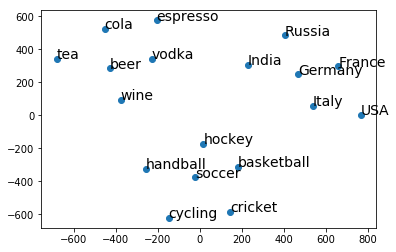

In [51]:
x=tsne[:,0]
y=tsne[:,1]
fig, ax=plt.subplots()
ax.scatter(x,y)
for item, x1,y1 in zip(items_vector, x, y):
    ax.annotate(item[0], (x1,y1),size=14)
plt.show()